In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\hp\Desktop\Applying_roles\BCG-X\Customer_Churn_Prediction\data\Telco-Customer-Churn.csv')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# checking class imbalance
df['Churn'].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

Churn is 26% that means 1 in 4 customers leaves, this is a massive revenue leakage, our model must prioritize catching Churners, in this case we must use proper metrucs like ROC-AUC, Recall

In [6]:
# fixing Data types
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [7]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

sometimes TotalCharges contains blank spaces, Converting creates NaNs
TotalCharges is cumulative revenue, if wrong -> finacial modeling becomes wrong, we cannot build business decisions on corrupted revenue

In [8]:
# Remove rows with missing TotalCharges
df = df.dropna()

Only few rows affected (likely new customers with tenure = 0).
Customers with zero tenure are new signups.
We could: Either remove them Or treat them separately
we would discuss this with stakeholders.

In [9]:
# converting the target to binary
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})

C:\Users\hp\AppData\Local\Temp\ipykernel_32288\183347352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})


Models require numeric targets.
1 = churn (lost revenue)
0 = retained
Clear financial interpretation.

In [10]:
# useless (we want patterns not memorizing IDs)
df = df.drop(columns=['customerID'])

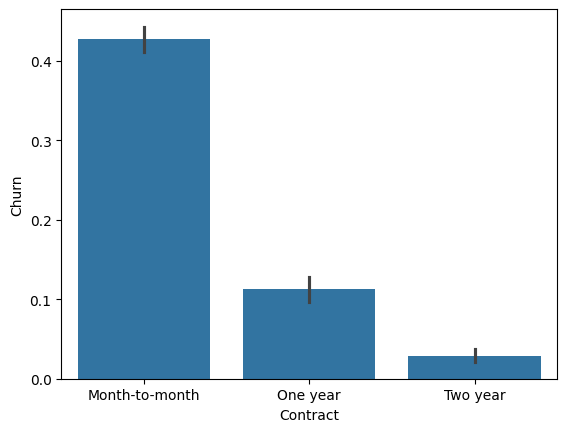

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
# Churn By contract Type
sns.barplot(x='Contract', y='Churn', data=df)
plt.show()


we want to check average churn rate per contract type.
here is: Month-to-month contracts have high churn, for example for a decision we might offer discounts for annual contracts 

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


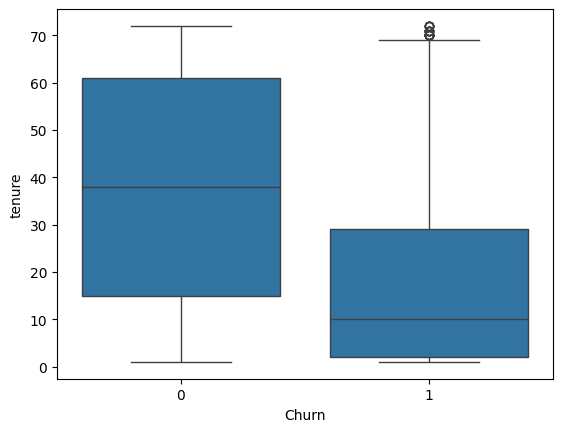

In [12]:
# Churn Vs Tenure
sns.boxplot(x='Churn', y='tenure', data=df)
plt.show()


in this case churners have low tenure  : the first 6 months are critical, we will focus onboarding programs

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


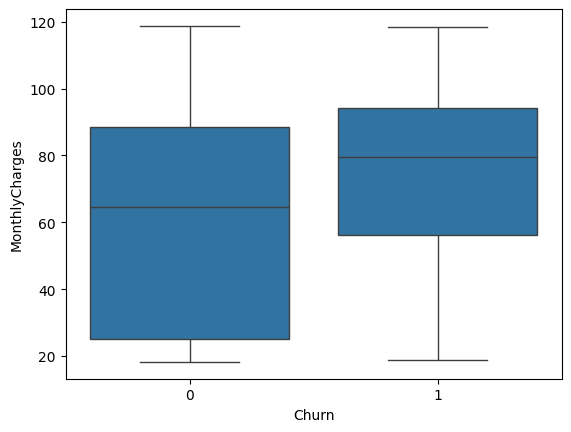

In [13]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.show()


churners pay higher monthly charges : pricing sensitively exists
and maybe competitors cheaper

## we observed:

### Churners have low tenure
### Churners have higher monthly charges
### Month-to-month contracts seem expensive

Churn analysis reveals three critical failures. Low-tenure churn signals weak onboarding we're not proving value fast enough in the critical early months. High monthly charges among churners indicate a value-price mismatch: premium customers expect premium experience and aren't getting it. Month-to-month contracts create zero switching costs, letting price-sensitive customers leave at will. The fix requires stronger early engagement, better value delivery for high-tier clients, and retention incentives beyond contractual lock-in.

In [14]:
# feature engineering
# creating meaningful business-driven fratures
# creating Tenure backets 
df['tenure_group'] = pd.cut(df['tenure'],
                            bins=[0,12,24,48,72],
                            labels=['0-1yr','1-2yr','2-4yr','4-6yr'])


Because churn risk is not linear across tenure. it means: 
Early customers vs loyal customers.
Helps strategy segmentation.

In [15]:
# Create Revenue per Tenure Ratio
df['charge_per_tenure'] = df['MonthlyCharges'] / (df['tenure'] + 1)


High monthly charge + low tenure = risky customer.
this will be used to: 
Detects customers paying a lot but staying short.
These are “high-value early churn risk” customers.

In [16]:
# contract Risk Indicator
df['is_month_to_month'] = (df['Contract'] == 'Month-to-month').astype(int)


Binary risk flag for commitment level.

## Preparing data for modeling

In [17]:
df_encoded = pd.get_dummies(df, drop_first=True)

drop_first = True, to avoid multicollinearity (important for logistic regression)

and because we want: 
Interpretable coefficients

Stable model

Clean insights

In [18]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


#### startify because Churn is imbalanced
We want realistic performance.
Overestimating model accuracy = bad strategic decisions.

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred))


ROC-AUC: 0.8382197638361866
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1033
           1       0.64      0.54      0.58       374

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Precision (class 1) = 0.64
Recall (class 1) = 0.54
Out of 374 churners,
we only correctly catch: 374 × 0.54 ≈ 202 customers we are missing ~172 churners

if each churner represent 80$ per month in 12 month 960$ 
172 x 960$ = 165,120 potential revenue loss
This is why recall matters more than accuracy.
In consulting, we optimize for financial impact, not accuracy.

lbfgs failed to converge: 
- Features not scaled
- Logistic regression sensitive to scale
- Some features have large magnitude differences

#### Adding proper scaling

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Identify numerical columns
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'charge_per_tenure']

# Everything else is already encoded dummy variables
other_cols = [col for col in X.columns if col not in numerical_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols)
    ],
    remainder='passthrough'
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=5000))
])

pipeline.fit(X_train, y_train)

y_prob = pipeline.predict_proba(X_test)[:,1]
y_pred = pipeline.predict(X_test)

from sklearn.metrics import roc_auc_score, classification_report

print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred))


ROC-AUC: 0.8376425550419059
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1033
           1       0.64      0.54      0.59       374

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.73      1407
weighted avg       0.79      0.80      0.79      1407



0.54 recall is not enough.

We must increase recall.
 we will change the classification threshold.
Right now threshold = 0.5. But in churn prediction: We prefer:
Catch more churners Even if precision drops slightly Because saving customers = money.

In [21]:
import joblib
joblib.dump(pipeline, "pipeline_model.pkl")


['pipeline_model.pkl']

In [23]:
import numpy as np

threshold = 0.35  
y_pred_adjusted = (y_prob > threshold).astype(int)

print(classification_report(y_test, y_pred_adjusted))


              precision    recall  f1-score   support

           0       0.89      0.79      0.83      1033
           1       0.55      0.72      0.62       374

    accuracy                           0.77      1407
   macro avg       0.72      0.75      0.73      1407
weighted avg       0.80      0.77      0.78      1407



Accuracy dropped to 0.77 (we don’t care much) because we care about catching churners
before we were catching 54% and now we are catching 72% of churners 
374 × 0.72 ≈ 269 churners instead of previously 202 churners
additional 67 churners saved
67 × 960 = $64,320 saved
Precision dropped to 0.55, this mean that We are targeting more customers who would not churn. 

Now we simulate full financial scenario.

Let’s assume:

Retention campaign cost = $20 per contacted customer

Retention success rate = 30

In [24]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_adjusted)

TN, FP, FN, TP = cm.ravel()

print("Confusion Matrix:")
print(cm)

# Financial assumptions
customer_value = 80 * 12
campaign_cost = 20
retention_rate = 0.30

# Customers we target = predicted churn
targeted_customers = TP + FP

# Successfully saved customers
saved_customers = TP * retention_rate

# Revenue saved
revenue_saved = saved_customers * customer_value

# Campaign cost
total_campaign_cost = targeted_customers * campaign_cost

# Net profit
net_profit = revenue_saved - total_campaign_cost

print("Targeted Customers:", targeted_customers)
print("Saved Customers:", saved_customers)
print("Revenue Saved:", revenue_saved)
print("Campaign Cost:", total_campaign_cost)
print("Net Profit:", net_profit)


Confusion Matrix:
[[815 218]
 [105 269]]
Targeted Customers: 487
Saved Customers: 80.7
Revenue Saved: 77472.0
Campaign Cost: 9740
Net Profit: 67732.0


Now we are not talking about: Accuracy, Precision, ML metrics
We are talking about: Net Profit.

If:

Net profit > 0 → deploy model
Net profit < 0 → adjust threshold

You can now even test:

Threshold 0.30

Threshold 0.40

Threshold 0.45

And pick the threshold that maximizes profit.

That’s advanced business optimization.

TN = 815 → loyal customers correctly identified

FP = 218 → customers incorrectly predicted as churners

FN = 105 → churners we missed

TP = 269 → churners correctly predicted

Targeted Customers = TP + FP = 487
These are the customers we will contact with retention offers.

Saved Customers = TP × retention_rate = 269 × 0.3 ≈ 81
These are actual churners we successfully retain.

Financial Impact

Revenue Saved = 81 × $960 = $77,472

Campaign Cost = 487 × $20 = $9,740

Net Profit = $77,472 − $9,740 ≈ $67,732

Executive Summary 

Customer Churn Analysis – Key Insights

Overall churn rate: ~26%

High-risk segment: Month-to-month contracts + low tenure + high monthly charges

ML Model Performance (threshold 0.35):

ROC-AUC: 0.84

Recall for churners: 0.72

Financial Simulation

Targeted campaign: 487 customers

Expected saved churners: 81

Revenue saved: $77,472

Campaign cost: $9,740

Net profit: $67,732

Recommendations

Offer incentives for month-to-month high-paying customers in first 6 months.

Consider pricing review for high monthly charges.

Monitor churn trends monthly and adjust campaign threshold for maximum ROI.

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\shap\explainers\_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


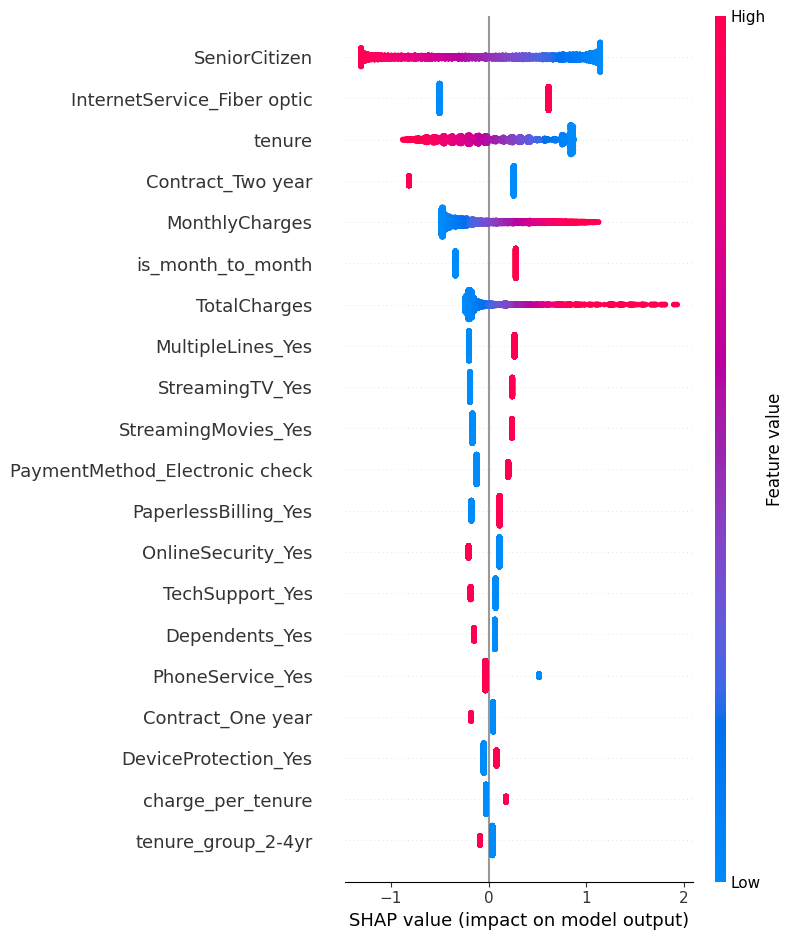

In [27]:
import shap
import numpy as np

# Extract model
model = pipeline.named_steps['classifier']

# Transform X_train and ensure it's a float numpy array
X_train_transformed = pipeline.named_steps['preprocessor'].transform(X_train)
X_train_transformed = np.array(X_train_transformed, dtype=float)  # 🔹 key fix

# Create SHAP explainer
explainer = shap.LinearExplainer(model, X_train_transformed, feature_perturbation="interventional")

# Get SHAP values
shap_values = explainer.shap_values(X_train_transformed)

# Plot summary
shap.summary_plot(shap_values, X_train_transformed, feature_names=X_train.columns)


In [ ]:
# ===========================
# 1️⃣ Import Libraries
# ===========================
import pandas as pd
import numpy as np
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import shap

full_X = df_encoded.drop('Churn', axis=1)
df_dashboard = df.copy()
df_dashboard['Churn_Prob'] = pipeline.predict_proba(full_X)[:,1]

df_dashboard['customerID'] = df.index.astype(str)

# SHAP summary for global feature importance
shap_summary = np.abs(shap_values).mean(0)
shap_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': shap_summary
}).sort_values('importance', ascending=True)

# Precompute Net Profit vs Threshold for slider guidance
thresholds = np.arange(0.1, 0.91, 0.01)
profits = []
for t in thresholds:
    y_pred = (df_dashboard['Churn_Prob'] > t).astype(int)
    TP = ((y_pred == 1) & (df_dashboard['Churn'] == 1)).sum()
    FP = ((y_pred == 1) & (df_dashboard['Churn'] == 0)).sum()
    targeted_customers = TP + FP
    saved_customers = TP * 0.3
    revenue_saved = saved_customers * 80*12
    campaign_cost = targeted_customers * 20
    profits.append(revenue_saved - campaign_cost)
profit_fig = px.line(x=thresholds, y=profits, labels={'x':'Threshold','y':'Net Profit'}, title='Net Profit vs Threshold')


app = dash.Dash(__name__)
app.title = "Telco Customer Churn Dashboard"

app.layout = html.Div([
    html.H1("Telco Customer Churn Dashboard", style={'textAlign':'center'}),
    
    html.H2("Financial Simulation"),
    html.Label("Adjust Churn Probability Threshold:"),
    dcc.Slider(
        id='threshold-slider',
        min=0.1,
        max=0.9,
        step=0.01,
        value=0.35,
        marks={0.1:'0.1', 0.25:'0.25', 0.35:'0.35', 0.5:'0.5', 0.75:'0.75', 0.9:'0.9'}
    ),
    html.Div(id='simulation-output', style={'marginTop':20}),
    dcc.Graph(figure=profit_fig),
    
    html.H2("SHAP Feature Importance (Global)"),
    dcc.Graph(
        id='shap-bar',
        figure=px.bar(shap_df, 
                      x='importance', 
                      y='feature', 
                      orientation='h', 
                      title='Feature Importance (SHAP)')
    ),
    
    html.H2("Churn Probability Distribution"),
    dcc.Graph(
        id='churn-hist',
        figure=px.histogram(df_dashboard, 
                            x='Churn_Prob', 
                            nbins=20, 
                            title='Churn Probability Distribution')
    ),
    
    html.H2("Individual Customer SHAP Explanation"),
    html.Label("Select Customer:"),
    dcc.Dropdown(
        id='customer-dropdown',
        options=[{'label': cid, 'value': idx} for idx, cid in enumerate(df_dashboard['customerID'])],
        value=0,
        searchable=True
    ),
    dcc.Graph(id='shap-beeswarm'),

    html.H2("Top 100 High-Risk Customers"),
    dcc.Graph(id='high-risk-heatmap')
])

@app.callback(
    Output('simulation-output', 'children'),
    Input('threshold-slider', 'value')
)
def update_simulation(threshold):
    y_pred_adjusted = (df_dashboard['Churn_Prob'] > threshold).astype(int)
    
    TP = ((y_pred_adjusted == 1) & (df_dashboard['Churn'] == 1)).sum()
    FP = ((y_pred_adjusted == 1) & (df_dashboard['Churn'] == 0)).sum()
    
    targeted_customers = TP + FP
    retention_rate = 0.3
    customer_value = 80*12
    campaign_cost = 20
    
    saved_customers = TP * retention_rate
    revenue_saved = saved_customers * customer_value
    total_campaign_cost = targeted_customers * campaign_cost
    net_profit = revenue_saved - total_campaign_cost
    
    return html.Div([
        html.P(f"Threshold: {threshold:.2f}"),
        html.P(f"Targeted Customers: {targeted_customers}"),
        html.P(f"Expected Saved Customers: {saved_customers:.1f}"),
        html.P(f"Revenue Saved: ${revenue_saved:,.0f}"),
        html.P(f"Campaign Cost: ${total_campaign_cost:,.0f}"),
        html.P(f"Net Profit: ${net_profit:,.0f}")
    ])


@app.callback(
    Output('shap-beeswarm', 'figure'),
    Input('customer-dropdown', 'value')
)
def update_shap_customer(idx):
    shap_vals = shap_values[idx]
    shap_df_indiv = pd.DataFrame({'feature': X_train.columns, 'shap_value': shap_vals})
    shap_df_indiv = shap_df_indiv.sort_values('shap_value', key=abs, ascending=False)
    
    fig = px.bar(
        shap_df_indiv,
        x='shap_value',
        y='feature',
        orientation='h',
        title=f'SHAP Values for Customer {df_dashboard.iloc[idx]["customerID"]}'
    )
    return fig


@app.callback(
    Output('high-risk-heatmap', 'figure'),
    Input('threshold-slider', 'value')
)
def update_high_risk_heatmap(threshold):
    df_risk = df_dashboard.copy()
    # Top 100 customers by churn probability
    df_top = df_risk.sort_values('Churn_Prob', ascending=False).head(100)
    
    # Columns to show in heatmap
    cols = ['customerID', 'Churn_Prob', 'tenure', 'MonthlyCharges', 'TotalCharges', 'is_month_to_month']
    df_top = df_top[cols]
    
    fig = px.imshow(
        df_top.set_index('customerID').T,  # transpose so features are rows
        text_auto=True,
        aspect="auto",
        color_continuous_scale='Reds',
        labels=dict(x="Customer ID", y="Feature", color="Value"),
        title="Top 100 High-Risk Customers Heatmap"
    )
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)
